<a href="https://colab.research.google.com/github/tajoutihamza/Income-Prediction-ML/blob/master/Income-Prediction-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des bibliothèques
On importe les bibliothèques nécessaires, Pandas pour la manipulation des données et NumPy pour les opérations numériques.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

# Lecture du fichier CSV et traitement des valeurs manquantes :
On charge les données à partir du fichier CSV et on remplace les valeurs manquantes (représentées par ' ?') par des valeurs NaN pour simplifier le traitement.


In [ ]:
dt = pd.read_csv('income_evaluation.csv',na_values=" ?");

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       30725 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      30718 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  31978 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Affichage du nombre de valeurs manquantes dans chaque colonne :

On affiche le nombre de valeurs manquantes dans chaque colonne pour prendre conscience des données manquantes.

In [ ]:
print("Number of missing values in each column:")
print(dt.isnull().sum())

Number of missing values in each column:
age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64


Remplacement des valeurs manquantes dans chaque colonne
On remplace les valeurs manquantes dans la colonne ' workclass' par le mode de cette colonne, qui est la valeur qui apparaît le plus fréquemment.

On applique la même logique pour la colonne ' occupation'.

On fait de même pour la colonne ' native-country'.

In [ ]:
print("Number of missing values before:")
print(dt[' workclass'].isnull().sum())
dt[' workclass'].fillna(dt[' workclass'].mode()[0], inplace=True)
print("Number of missing values after:")
print(dt[' workclass'].isnull().sum())

Number of missing values before:
1836
Number of missing values after:
0


In [ ]:
print("Number of missing values before:")
print(dt[' occupation'].isnull().sum())
dt[' occupation'].fillna(dt[' occupation'].mode()[0], inplace=True)
print("Number of missing values after:")
print(dt[' occupation'].isnull().sum())


Number of missing values before:
1843
Number of missing values after:
0


In [ ]:
print("Number of missing values before:")
print(dt[' native-country'].isnull().sum())
dt[' native-country'].fillna(dt[' native-country'].mode()[0], inplace=True)
print("Number of missing values after:")
print(dt[' native-country'].isnull().sum())


Number of missing values before:
583
Number of missing values after:
0


In [ ]:
print("Number of missing values in each column:")
print(dt.isnull().sum().sum())

Number of missing values in each column:
0


# observation

# Histogramme des âges :
Affiche la distribution des âges pour comprendre la répartition des personnes dans différentes tranches d'âge.

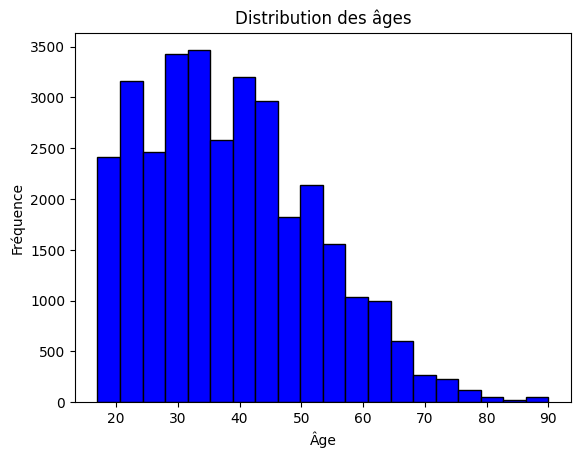

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dt['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


# Diagramme à barres pour l'éducation :
Donne un aperçu de la distribution des niveaux d'éducation.

<ipython-input-15-4a578a815a83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' education', data=dt, palette='viridis')


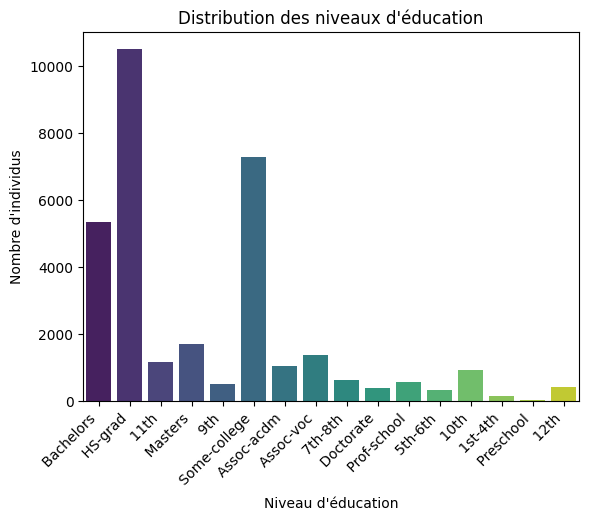

In [ ]:
import seaborn as sns

sns.countplot(x=' education', data=dt, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution des niveaux d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre d\'individus')
plt.show()

# Diagramme à barres pour la classe de travail :
Montre la distribution des classes de travail.


<ipython-input-16-9c6329e9db7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' workclass', data=dt, palette='Set2')


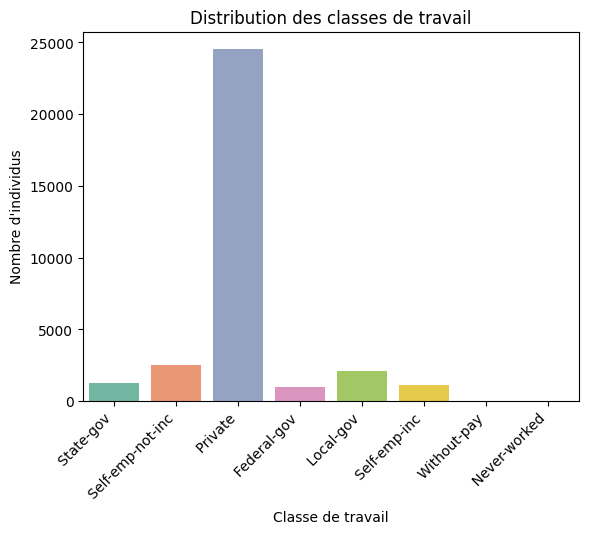

In [ ]:
sns.countplot(x=' workclass', data=dt, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution des classes de travail')
plt.xlabel('Classe de travail')
plt.ylabel('Nombre d\'individus')
plt.show()

# Diagramme à barres pour le revenu :
Visualise la répartition entre les personnes gagnant plus ou moins de 50 000 $ par an.

<ipython-input-17-9f115a2f4b30>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' income', data=dt, palette='muted')


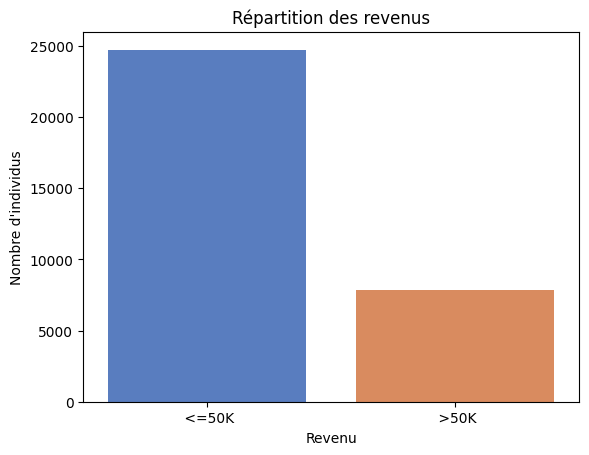

In [ ]:
sns.countplot(x=' income', data=dt, palette='muted')
plt.title('Répartition des revenus')
plt.xlabel('Revenu')
plt.ylabel('Nombre d\'individus')
plt.show()

#  feature selection
Dans ces étapes de sélection de caractéristiques, plusieurs colonnes ont été retirées du DataFrame initial. Tout d'abord, la colonne 'fnlwgt' a été éliminée car elle représente une pondération sans information directe sur le revenu. Ensuite, la colonne 'education' a été supprimée car elle est redondante avec 'education-num', qui fournit une représentation numérique équivalente. De plus, deux nouvelles colonnes, 'capital-gain' et 'capital-loss', ont été combinées pour créer une colonne 'net-capital', simplifiant ainsi la représentation des gains et pertes financières. Enfin, la colonne 'relationship' a été supprimée car elle ne semblait pas apporter de contribution claire à la prédiction du revenu. Ces choix de suppression visent à simplifier le jeu de données tout en préservant les informations pertinentes pour la tâche de prédiction du revenu.








In [ ]:
dt.drop_duplicates(inplace=True)
columns_to_drop = [' education', ' race', ' sex']
dt = dt.drop(columns=columns_to_drop)
dt[' net-capital'] = dt[' capital-gain'] - dt[' capital-loss']
dt = dt.drop([' capital-gain'], axis=1)
dt = dt.drop([' capital-loss'], axis=1)

In [ ]:
dt

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,hours-per-week,native-country,income,net-capital
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,13,United-States,<=50K,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,40,United-States,<=50K,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,40,United-States,<=50K,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,38,United-States,<=50K,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,40,United-States,>50K,0
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,40,United-States,<=50K,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,20,United-States,<=50K,0


# Encodage des Variables Catégorielles :


Encodage des Variables Catégorielles :

Description : Cette étape de prétraitement utilise le module LabelEncoder de la bibliothèque scikit-learn pour convertir les variables catégorielles du jeu de données en valeurs numériques. Les variables catégorielles, telles que 'workclass', 'marital-status', 'occupation', 'relationship', et 'native-country', sont transformées en numéros entiers. Cette transformation permet de représenter ces catégories par des valeurs numériques, ce qui est souvent requis par les algorithmes de machine learning.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns=[' workclass',' marital-status',' occupation',' native-country',' relationship']

for column in categorical_columns:
    dt[column] = label_encoder.fit_transform(dt[column])

dt[' income'] = dt[' income'].replace({' >50K': 1, ' <=50K': 0})

# Normalisation des Caractéristiques Numériques :




In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['age', ' education-num', ' hours-per-week']

scaler = MinMaxScaler()

dt[numerical_features] = scaler.fit_transform(dt[numerical_features])


In [ ]:
from sklearn.preprocessing import StandardScaler

Standard_features = [' net-capital', ' fnlwgt']
scaler = StandardScaler()

dt[Standard_features] = scaler.fit_transform(dt[Standard_features])

In [ ]:
dt

# Séparation des Données en Ensembles d'Entraînement et de Test

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = dt.drop(' income', axis=1)
y = dt[' income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Description des Modèles


## Random Forest (Forêt Aléatoire) :

Utilisation : Random Forest est un modèle d'ensemble basé sur des arbres de décision. Il est robuste, résistant au surapprentissage et performant pour des tâches complexes.
Pourquoi : Il est adapté aux ensembles de données complexes avec de nombreuses caractéristiques et des relations non linéaires.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

## Support Vector Machine (SVM) :

Utilisation : SVM est utilisé pour la classification et la régression. Il trouve un hyperplan optimal pour séparer les classes dans un espace de grande dimension.
Pourquoi : Convient aux tâches de classification où la séparation linéaire est difficile dans un espace de grande dimension.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_model_linear = SVC(kernel='linear', random_state=42)
svm_model_linear.fit(X_train, y_train)
y_pred_linear = svm_model_linear.predict(X_test)

svm_model_rbf = SVC(random_state=42)
svm_model_rbf.fit(X_train, y_train)
y_pred_rbf = svm_model_rbf.predict(X_test)

print("Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print("=============================")
print("\nRBF Kernel:")
print(classification_report(y_test, y_pred_rbf))

Linear Kernel:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      4905
           1       0.90      0.23      0.36      1603

    accuracy                           0.80      6508
   macro avg       0.85      0.61      0.62      6508
weighted avg       0.82      0.80      0.75      6508


RBF Kernel:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4905
           1       0.99      0.16      0.28      1603

    accuracy                           0.79      6508
   macro avg       0.89      0.58      0.58      6508
weighted avg       0.83      0.79      0.73      6508



## k-Nearest Neighbors (k-NN) :

Utilisation : k-NN attribue une classe en fonction de la majorité des voisins les plus proches.
Pourquoi : C'est simple, adaptatif et efficace pour des ensembles de données de taille modérée.

Text(0, 0.5, 'Erreur')

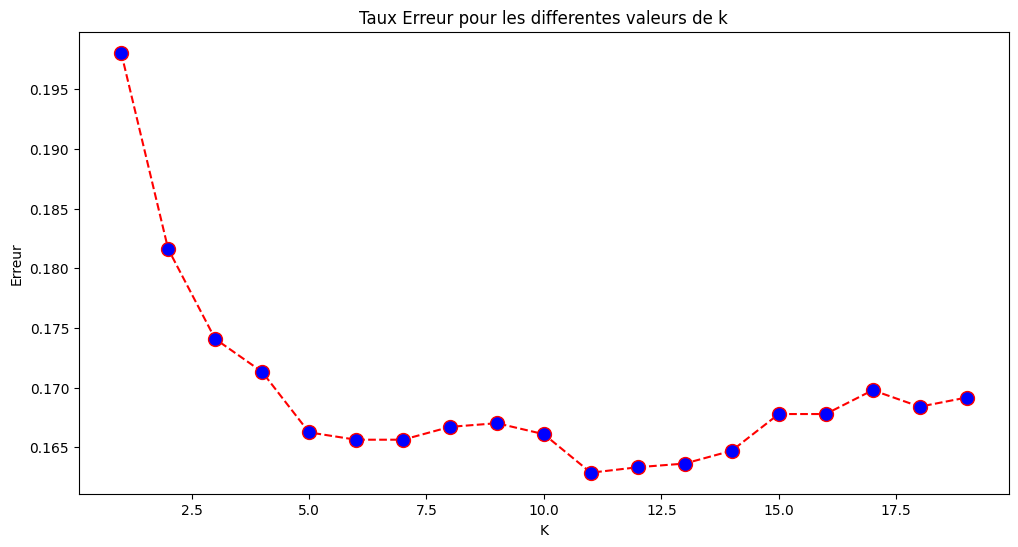

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [ ]:
#Le meilleur nombre de voisins k=11
knn = KNeighborsClassifier(11)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.84
[[4507  398]
 [ 662  941]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4905
           1       0.70      0.59      0.64      1603

    accuracy                           0.84      6508
   macro avg       0.79      0.75      0.77      6508
weighted avg       0.83      0.84      0.83      6508



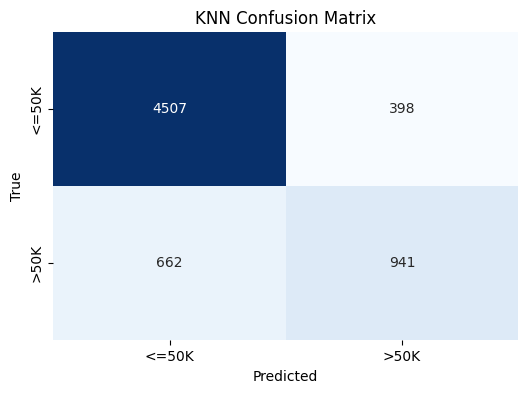

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Naive_Bayes algorithm :
est particulièrement utile pour la classification de textes et les problèmes comportant un grand nombre de caractéristiques. Il suppose l'indépendance entre les caractéristiques, ce qui n'est pas toujours le cas.

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)

## LogisticRegression Algorithm
est un bon point de départ pour les tâches de classification binaire, en particulier lorsque la relation entre les caractéristiques et la variable cible est supposée être linéaire.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree (Arbre de Décision) :

Utilisation : Les arbres de décision divisent l'ensemble de données en sous-ensembles basés sur les caractéristiques.
Pourquoi : Ils sont interprétables, adaptés à des règles de décision explicites et peuvent gérer des types de données hétérogènes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

## Gradient Boosting :

Utilisation : C'est une méthode d'ensemble qui combine plusieurs modèles faibles pour créer un modèle fort.
Pourquoi : Performant, il peut capturer des relations complexes et ajuster les erreurs des modèles précédents.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

## Multilayer Perceptron (MLP) Neural Network :

Utilisation : Un type de réseau de neurones artificiels avec des couches multiples.
Pourquoi : Convient aux problèmes complexes de classification non linéaire et peut apprendre des représentations abstraites.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=60, max_iter=1000)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)








#Évaluation

La précision (accuracy), le rapport de classification (classification_report) et la matrice de confusion sont utilisés pour évaluer la performance de chaque modèle.

#Visualisation :

La matrice de confusion est affichée sous forme de heatmap pour visualiser les performances de classification, montrant les prédictions par rapport aux valeurs réelles pour chaque classe.


Random Forest Accuracy: 0.8591

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4905
           1       0.75      0.64      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.86      6508



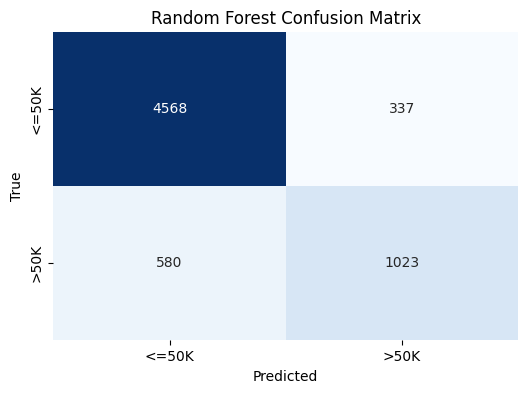


Naive Bayes Accuracy: 0.8098

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4905
           1       0.78      0.32      0.45      1603

    accuracy                           0.81      6508
   macro avg       0.80      0.64      0.67      6508
weighted avg       0.81      0.81      0.78      6508



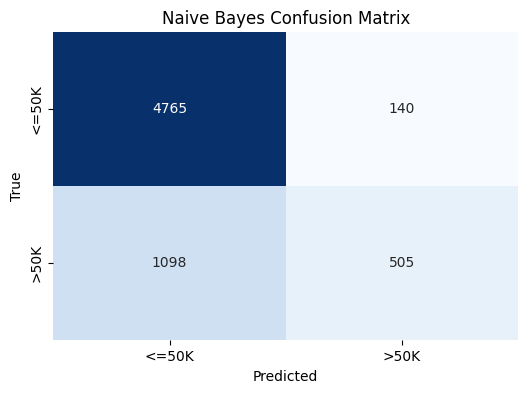


Support Vector Machine RBF Accuracy: 0.7929

Support Vector Machine RBF Classification Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4905
           1       0.99      0.16      0.28      1603

    accuracy                           0.79      6508
   macro avg       0.89      0.58      0.58      6508
weighted avg       0.83      0.79      0.73      6508



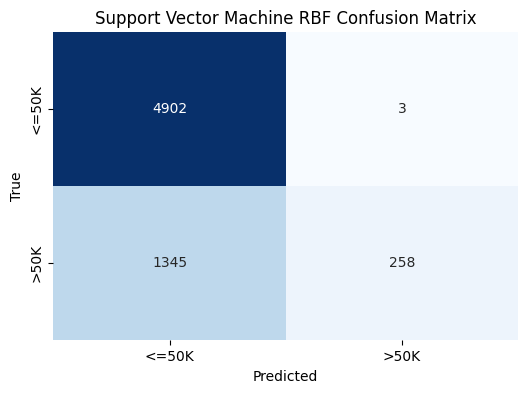


Support Vector Machine linear Accuracy: 0.8032

Support Vector Machine linear Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      4905
           1       0.90      0.23      0.36      1603

    accuracy                           0.80      6508
   macro avg       0.85      0.61      0.62      6508
weighted avg       0.82      0.80      0.75      6508



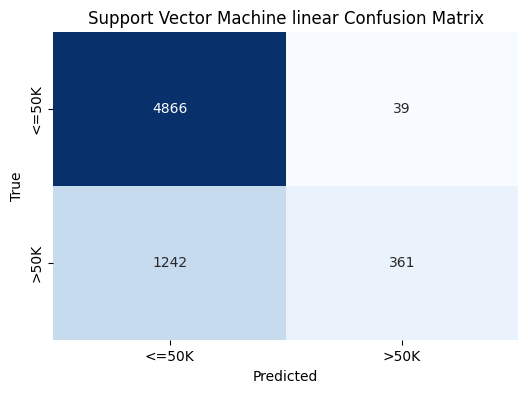


Decision Tree Accuracy: 0.8065

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4905
           1       0.60      0.64      0.62      1603

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.74      6508
weighted avg       0.81      0.81      0.81      6508



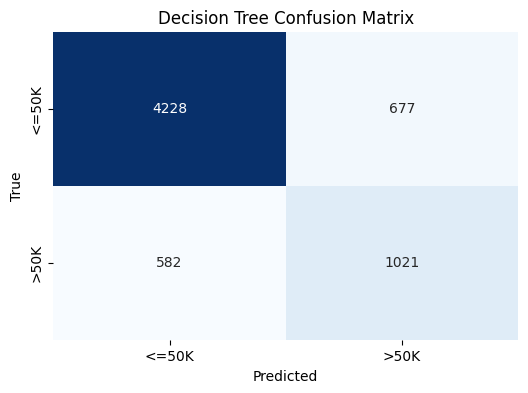


LogisticRegression Accuracy: 0.8680

LogisticRegression Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4905
           1       0.81      0.61      0.69      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.78      0.81      6508
weighted avg       0.86      0.87      0.86      6508



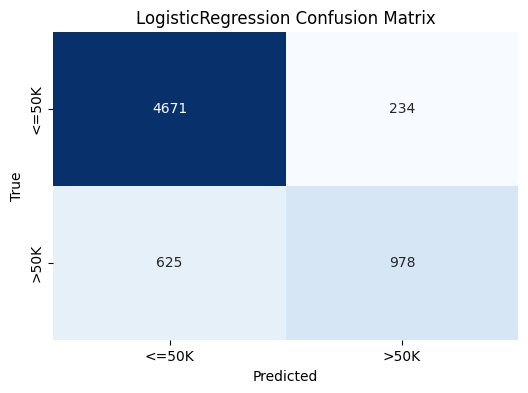


Gradient Boosting Accuracy: 0.8195

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4905
           1       0.71      0.45      0.55      1603

    accuracy                           0.82      6508
   macro avg       0.78      0.69      0.72      6508
weighted avg       0.81      0.82      0.80      6508



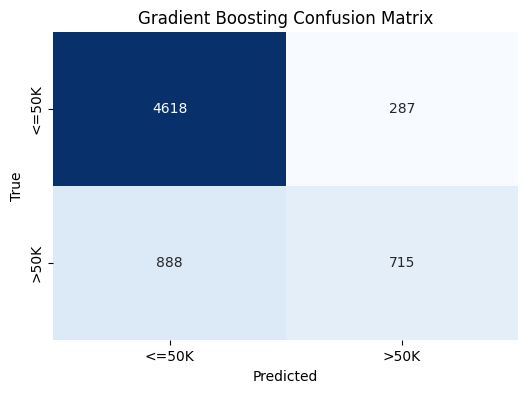


MLP Accuracy: 0.8523

MLP Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4905
           1       0.72      0.66      0.69      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.79      0.80      6508
weighted avg       0.85      0.85      0.85      6508



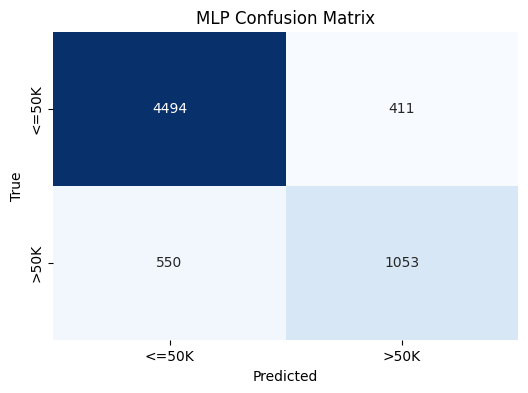


KNN Accuracy: 0.8371

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4905
           1       0.70      0.59      0.64      1603

    accuracy                           0.84      6508
   macro avg       0.79      0.75      0.77      6508
weighted avg       0.83      0.84      0.83      6508



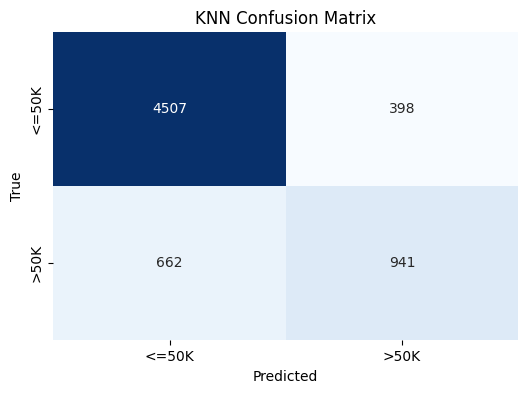


 Comparision between algorithms based on accuracy:

 here's the result of the algorithm's accuracy sorted from highest to lowest:

['LogisticRegression', 0.8680086047940996]
['Random Forest', 0.8590964966195451]
['MLP', 0.8523355869698832]
['KNN', 0.8371235402581438]
['Gradient Boosting', 0.8194529809465273]
['Naive Bayes', 0.8097725875845113]
['Decision Tree', 0.8065457897971727]
['Support Vector Machine linear', 0.8031653349723418]
['Support Vector Machine RBF', 0.7928703134603565]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

classifier_names = ['Random Forest', 'Naive Bayes', 'Support Vector Machine RBF', 'Support Vector Machine linear', 'Decision Tree','LogisticRegression', 'Gradient Boosting', 'MLP', 'KNN']
predictions = [y_pred_rf, y_pred_nb, y_pred_rbf, y_pred_linear, y_pred_dt, y_pred_gb, y_pred_lr, y_pred_mlp,y_pred_knn]
result_array = []

for predict, name in zip(predictions, classifier_names):

    # Évaluation et comparaison des modèles
    print("===================================================")
    accuracy = accuracy_score(y_test, predict)

    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, predict))
    result_array.append([name, accuracy])
    # Matrice de confusion
    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

result_array_sorted = sorted(result_array, key=lambda x: x[1], reverse=True)
print("\n Comparision between algorithms based on accuracy:")
print("\n here's the result of the algorithm's accuracy sorted from highest to lowest:\n")
for row in result_array_sorted:
    print(row)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)


Meilleurs paramètres : {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=20, min_samples_leaf=4, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

best_rf_model = RandomForestClassifier(random_state=42, **best_params)

best_rf_model.fit(X_train, y_train)

predictions = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy avec meilleurs paramètres : {accuracy:.4f}")

print("Nouveau Rapport de Classification :\n", classification_report(y_test, predictions))


Accuracy avec meilleurs paramètres : 0.8632
Nouveau Rapport de Classification :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4905
           1       0.77      0.63      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.83      0.78      0.80      6508
weighted avg       0.86      0.86      0.86      6508

